## imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
# scikit
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

## carga de datos

In [16]:
#  CARGA DATAFRAME ATRIBUTOS
df_atributos = pd.read_excel('dfAtributosNormalizado.xlsx').drop('Unnamed: 0',axis=1)
df_atributos.head()

,mlotst_0,zos_0,bottomT_0,thetao_0,so_0,uo_0,vo_0,mlotst_5,zos_5,bottomT_5,...,so_5,uo_5,vo_5,mlotst_10,zos_10,bottomT_10,thetao_10,so_10,uo_10,vo_10
0,0.458610,0.000988,0.118141,0.118195,0.308355,0.000322,-0.000739,0.458610,0.000988,0.118141,...,0.308355,0.000265,-0.000480,0.458610,0.000988,0.118141,0.118188,0.308355,0.000220,-0.000361
1,0.164661,0.000871,0.172151,0.171491,0.496668,0.001678,0.000577,0.164661,0.000871,0.172151,...,0.497028,0.001588,0.000505,0.164661,0.000871,0.172151,0.173624,0.496916,0.001371,0.000307
2,0.288358,0.001631,0.129202,0.163865,0.454569,0.000249,0.001145,0.288358,0.001631,0.129202,...,0.454569,0.000050,0.000805,0.288358,0.001631,0.129202,0.163875,0.454569,-0.000025,0.000631
3,0.291737,0.000740,0.165685,0.165637,0.439698,-0.000072,0.001038,0.291737,0.000740,0.165685,...,0.439698,-0.000386,0.000885,0.291737,0.000740,0.165685,0.165637,0.439698,-0.000555,0.000813
4,0.292609,0.000250,0.163246,0.163168,0.440952,-0.000646,0.000751,0.292609,0.000250,0.163246,...,0.440952,-0.000856,0.000557,0.292609,0.000250,0.163246,0.163178,0.440952,-0.000807,0.000484


In [17]:
#  CARGA DATAFRAME AVISTAMIENTOS
df_avistamientos = pd.read_excel('dfAvistamientos.xlsx').drop('Unnamed: 0',axis=1)
df_avistamientos.head()

,Avistamientos
0,1
1,1
2,1
3,20
4,151


In [72]:
# DATAFRAMES A LISTAS
listado_atributos = df_atributos.values.tolist()
listado_avistamientos = df_avistamientos.values.tolist()
# CONJUNTOS DE ENTRENAMIENTO Y TEST
atributos_train, atributos_test, avistamientos_train, avistamientos_test = train_test_split(listado_atributos,listado_avistamientos,test_size=0.2)
atributos_train = np.array(atributos_train)
atributos_test = np.array(atributos_test)
avistamientos_train = np.ravel(np.array(avistamientos_train))
avistamientos_test = np.ravel(np.array(avistamientos_test))

In [73]:
def imprimir(mod,X_test,Y_test,Y_prediccion):
    # COEFICIENTES (pendientes)
    print('Coeficientes:')
    print(mod.coef_)
    print(mod.intercept_)
    # The mean squared error
    print('Error cuadrático medio: %.2f'% mean_squared_error(Y_test, Y_prediccion))
    # The coefficient of determination: 1 is perfect prediction
    print('Coeficiente de determinación con datos test: %.2f'% mod.score(X_test, Y_test)) 
    print('Coeficiente de determinación con datos train: %.2f'% mod.score(atributos_train, avistamientos_train)) 


    # datos que teniamos y los uqe hemos obtenido
    # [print(Y_test[i],Y_pred[i]) for i in range(len(Y_pred))]

### Regresion Lineal
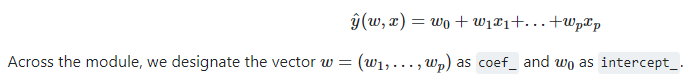

In [74]:
# REGRESION LINEAL
lr = linear_model.LinearRegression()
# se entrena al modelo
lr.fit(atributos_train,avistamientos_train)
# prediccion
avistamientos_prediccion_lineal = lr.predict(atributos_test)

In [78]:
imprimir(lr,atributos_test,avistamientos_test,avistamientos_prediccion_lineal)

Coeficientes:
[-7.24850248e+01  3.17638261e+04  2.21436730e+02  6.88549434e+03
 -1.15858467e+04 -3.11376385e+05 -2.84258897e+05 -7.24850248e+01
  3.17638261e+04  2.21436730e+02 -6.69565967e+03  5.37065765e+03
  2.76070844e+05  2.55963267e+05 -7.24850248e+01  3.17638261e+04
  2.21436730e+02 -4.48680452e+03  8.20792615e+03  3.68485672e+04
  4.42914101e+04]
-73.70110979279913
Error cuadrático medio: 91049.99
Coeficiente de determinación con datos test: 0.09
Coeficiente de determinación con datos train: 0.15


### Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_rf = rf.predict(atributos_test)
rf.score(atributos_test,avistamientos_test)

### Vecino más cercano